# Project 2: Forecasting Starbucks Revenue

**Due: May 25, 2025**  
**Work in Pairs**

## 1. IMPACT Model Planning (25 points) In a Word Document
- Define the risk (e.g., pressure to overstate revenue) and its audit relevance
- Choose and justify:
  - One internal variable
  - One macroeconomic variable you will scrape (e.g., CPI or interest rate)
  - One source of sentiment (e.g., Yahoo Finance headlines during earnings seasons)
- Describe your planned analysis (ARIMA, ARIMAX, regression, tone review)
- What patterns or red flags will you look for?
- How will you explain the results to an audit committee?
- Suggest 1–2 key metrics an auditor should continue monitoring
- Identify one limitation in your data or method

## 2. Visualize and Forecast Revenue Using ARIMA (25 points)
- Plot historical revenue from `starbucks_financials_expanded.csv`
- Describe trends (e.g., seasonality, volatility) and choose a forecast window (2–4 quarters)
- Build and evaluate an ARIMA model
- Report AIC/RMSE, and plot actual vs. forecasted revenue
- Reflect on what the forecast suggests about performance pressure

In [1]:
#Step 1 import the data 
import pandas as pd 
df = pd.read_csv("starbucks_financials_expanded.csv", parse_dates = ["date"], index_col = "date")
df.head()

,revenue,expenses,transactions,store_count,avg_ticket,marketing_spend,employee_count,loyalty_members,mobile_orders_pct,coffee_bean_price,temperature_index
date,,,,,,,,,,,
2018-03-31,5924.18,4201.67,1011,34463,5.96,386.93,334766,24392,0.28,2.96,69.42
2018-06-30,5895.87,3859.70,1039,34248,5.78,348.37,373530,23528,0.36,2.03,67.94
2018-09-30,6222.79,4422.88,863,31027,6.27,578.91,393557,20474,0.36,1.52,89.78
2018-12-31,6572.06,4383.91,944,31695,5.44,542.44,361087,22757,0.23,2.99,57.04
2019-03-31,6263.20,4111.82,897,30495,4.74,490.02,395839,22249,0.30,2.93,50.72


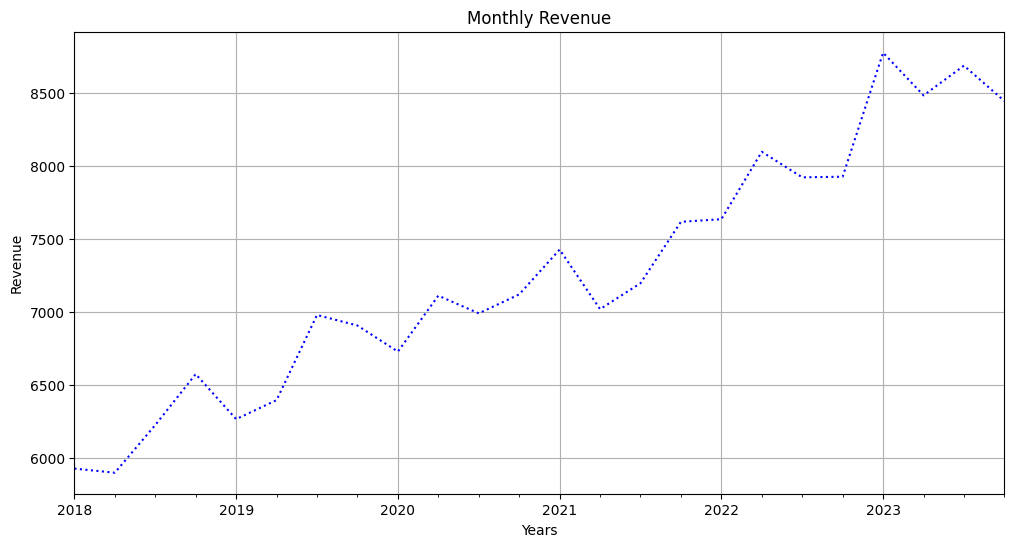

In [2]:
import matplotlib.pyplot as plt

df["revenue"].plot(title="Monthly Revenue", figsize=(12, 6), color = "blue", linestyle = "dotted")
plt.ylabel("Revenue")
plt.xlabel("Years")
plt.grid(True)
plt.show()

# Discussion: 

The model shows limited stationarity, but a clear upward trend in revenue over the past six years. This suggests that Starbucks has experienced steady growth, which could be due to expansion, pricing strategy, or consistent customer demand. We also noticed a slight seasonal pattern, with revenue tending to rise in the summer and fall months, possibly linked to consumer habits like increased travel or spending during those times.
Based on this trend, we're moving forward with a forecast for the remaining quarters of 2023. This will give us a clearer picture of whether Starbucks’ year-end revenue is on track, which is helpful context for the audit. If the actual revenue later appears significantly different from the forecast, it could prompt further review, especially considering the external pressures the company may be facing.

# ARIMA Model

In [3]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df["revenue"], order=(1,1,1))

# Step 2: Fit the model
results = model.fit()

# Step 3: Review the model output
results.summary()


c:\Users\NoahL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\NoahL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\NoahL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                revenue   No. Observations:                   24
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -165.395
Date:                Sat, 24 May 2025   AIC                            336.789
Time:                        15:56:21   BIC                            340.196
Sample:                    03-31-2018   HQIC                           337.646
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1580      1.153     -0.137      0.891      -2.419       2.103
ma.L1         -0.0720      1.108     -0.065      0.948      -2.243       2.099
sigma2      1.017e+05   2.85e+04      3.570      0.000    4.59e+04    1.58e+05
===================================================================================
Ljung-Box (L1) (Q):                   2.72   Jarque-Bera (JB):                 1.09
Prob(Q):                              0.10   Prob(JB):                         0.58
Heteroskedasticity (H):               1.36   Skew:                             0.52
Prob(H) (two-sided):                  0.68   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Interpretation: 

In our ARIMA model, both the MA(1) and AR(1) terms have high p-values, indicating they are not statistically significant. This suggests that short-term adjustments and immediate past revenue values do not meaningfully improve the model’s ability to forecast future revenue. In other words, Starbucks’ revenue is not heavily influenced by short-run patterns alone, and other variables may be needed to capture more predictive power.

The AIC and BIC values are moderately low, which signals the model is a decent fit but not particularly strong. This reinforces the idea that while revenue has a general upward trend, relying solely on past revenue limits forecasting accuracy. This sets up the rationale for incorporating external variables, such as macroeconomic indicators and internal operational metrics, into a more robust model like ARIMAX or multivariate regression, where those outside influences may better explain and predict Starbucks’ revenue behavior.



# Forecast the Model

We chose to forecast the model 3 quarters ahead, til the fiscal year ends on September 29th. We did this because we wanted to see what the companies earnings for the 2024 fiscal year would look like.  

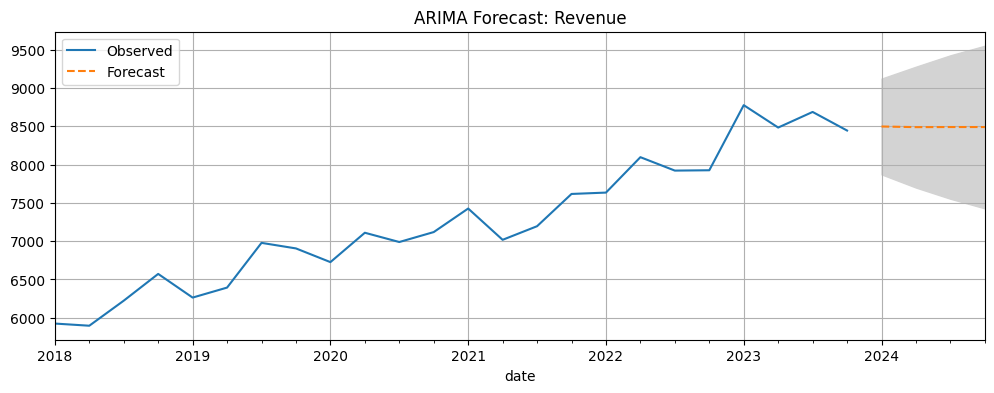

In [4]:
forecast = results.get_forecast(steps=4)
ci = forecast.conf_int()

df["revenue"].plot(label="Observed", figsize=(12, 4))

forecast.predicted_mean.plot(label="Forecast", style='--')

plt.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color="lightgray")

plt.legend()
plt.title("ARIMA Forecast: Revenue")
plt.grid(True)

plt.show()

# Discussion

The forecast model suggests that pressures to perform might exist. Since revnues have been steadily increasing for the last 5 years, the CEO may feel pressured to overstate revenue if they had a bad year. Although, we do not have evidence yet to prove this has occurred, the pressure piece of the fraud triangle exists.

## 3. Add a Scraped Macroeconomic Indicator to ARIMAX (25 points)
- Scrape one macroeconomic variable (e.g., CPI or interest rates)
- Add it to an ARIMAX model and compare performance to your ARIMA model
- Interpret the macro variable’s impact using theory and model output

In [ ]:
import requests
import pandas as pd

api_key = "18b5149ec21c04e0b38290b1de865d0b"
series_id = "CPALTT01USQ657N"

url = "https://api.stlouisfed.org/fred/series/observations"
params = {
    "series_id": series_id,
    "api_key": api_key,
    "file_type": "json",
    "observation_start": "2018-03-31",
    "observation_end": "2023-12-31"
}

response = requests.get(url, params=params)
data = response.json()["observations"]
df1 = pd.DataFrame(data)
df1 = df1[["date", "value"]]
df1.columns = ["date", "CPI"]
df1["date"] = pd.to_datetime(df1["date"])
df1["CPI"] = pd.to_numeric(df1["CPI"], errors='coerce')

df_quarterly = df1.groupby(pd.Grouper(key="date", freq="Q")).last().reset_index()
print(df_quarterly.tail())
df_quarterly.to_csv("CPI_quarterly.csv", index=False)



         date       CPI
19 2022-12-31  0.367161
20 2023-03-31  1.044907
21 2023-06-30  1.192332
22 2023-09-30  0.866427
23 2023-12-31  0.104508


C:\Users\NoahL\AppData\Local\Temp\ipykernel_22912\3124219555.py:29: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_quarterly = df1.groupby(pd.Grouper(key="date", freq="Q")).last().reset_index()


In [6]:
import pandas as pd

df_cpi = pd.read_csv("CPI_quarterly.csv", parse_dates=["date"], index_col = "date")

df_merged = pd.merge(df, df_cpi, on="date", how="left")

print(df_merged.head())
df_merged.to_csv("merged_with_cpi.csv", index=False)

            revenue  expenses  transactions  store_count  avg_ticket  \
date                                                                   
2018-03-31  5924.18   4201.67          1011        34463        5.96   
2018-06-30  5895.87   3859.70          1039        34248        5.78   
2018-09-30  6222.79   4422.88           863        31027        6.27   
2018-12-31  6572.06   4383.91           944        31695        5.44   
2019-03-31  6263.20   4111.82           897        30495        4.74   

            marketing_spend  employee_count  loyalty_members  \
date                                                           
2018-03-31           386.93          334766            24392   
2018-06-30           348.37          373530            23528   
2018-09-30           578.91          393557            20474   
2018-12-31           542.44          361087            22757   
2019-03-31           490.02          395839            22249   

            mobile_orders_pct  coffee_bean_pri

In [7]:
exog = df_merged[["CPI"]]
arimax_model = ARIMA(df_merged["revenue"], order=(1, 1, 1), exog=exog)
arimax_results = arimax_model.fit()
arimax_results.summary()

c:\Users\NoahL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\NoahL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\NoahL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                revenue   No. Observations:                   24
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -165.248
Date:                Sat, 24 May 2025   AIC                            338.497
Time:                        15:56:24   BIC                            343.039
Sample:                    03-31-2018   HQIC                           339.639
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CPI          -48.5472    107.748     -0.451      0.652    -259.729     162.635
ar.L1         -0.1489      1.296     -0.115      0.909      -2.690       2.392
ma.L1         -0.0761      1.213     -0.063      0.950      -2.454       2.302
sigma2      1.003e+05   2.89e+04      3.472      0.001    4.37e+04    1.57e+05
===================================================================================
Ljung-Box (L1) (Q):                   2.66   Jarque-Bera (JB):                 1.44
Prob(Q):                              0.10   Prob(JB):                         0.49
Heteroskedasticity (H):               1.72   Skew:                             0.61
Prob(H) (two-sided):                  0.46   Kurtosis:                         2.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Results
When comparing results, the original ARIMA model has a lower AIC and BIC than the ARIMAX model. This indicates that, from a model selection standpoint, the simpler ARIMA model provided a better statistical fit than the version that included CPI as an external regressor. Additionally, the p-value for CPI in the ARIMAX model is not statistically significant. This suggests that CPI does not meaningfully contribute to explaining Starbucks’ quarterly revenue in our time frame. While inflation might be expected to influence consumer behavior or input costs, its direct relationship to revenue isn’t strong enough to improve the forecast in this case. There may be some worries revolving CPI's relation to revenue, as historically revenue growth matches high inflation (which CPI can be a proxy for) there may be valid reason to suspect that starbucks revenue is overstated as general inflation is not changing at the same rate. To further investigate, we should look into the financial results of Starbucks competitors, and see if their revenue is also outpacing CPI. This result highlights that not all macroeconomic indicators are reliable predictors of firm-level revenue. It also suggests that Starbucks’ revenue may be driven more by internal factors (like store openings, expenses, or loyalty program engagement) than by broader inflation trends, at least in the short term.


## 4. Build a Regression Model Step-by-Step (50 points)
### Step 1: One Internal Variable
- Choose and justify one internal variable
- Run a regression and interpret R², coefficient, and p-value

### Step 2: Add a Second Internal Variable
- Choose a second internal variable (justify with theory)
- Update the model and compare metrics (R², AIC)

### Step 3: Add Macroeconomic Variable
- Add the macroeconomic variable from ARIMAX
- Interpret its significance in context

### Step 4: Narrative Tone Analysis
- Scrape **1–2 headlines per earnings season (Jan, Apr, Jul, Oct)**
- Use VADER to score tone (compound score)
- Reflect on whether tone matches performance or raises red flags

# Step 1

In [8]:
#Step 1
import statsmodels.api as sm

# Define variables
X = df["expenses"]
y = df["revenue"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()

# View summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     182.8
Date:                Sat, 24 May 2025   Prob (F-statistic):           3.90e-12
Time:                        15:56:24   Log-Likelihood:                -168.72
No. Observations:                  24   AIC:                             341.4
Df Residuals:                      22   BIC:                             343.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1275.3395    446.720      2.855      0.009     348.898    2201.781
expenses       1.1799      0.087     13.519      0.000       0.999       1.361
==============================================================================
Omnibus:                        1.642   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.440   Jarque-Bera (JB):                0.996
Skew:                          -0.077   Prob(JB):                        0.608
Kurtosis:                       2.014   Cond. No.                     3.92e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Rationale:
We chose expenses as the first independent variable in our regression model because revenue and expenses are closely linked in a business like Starbucks. Increased revenue typically results in higher operating costs, such as labor, inventory, and store operations, meaning the two move together. From a financial reporting standpoint, this relationship is expected, since expenses are often a direct function of sales volume. Our general theory is that if revenue is overstated, than quarterly expenses will not be a significant predictor of revenue.

Results:
The regression output shows that expenses are a statistically significant predictor of revenue, with a p-value below the standard significance threshold. The coefficient of 1.1799 suggests that for every one-unit increase in expenses, revenue increases by approximately 1.18 units. This positive relationship reinforces the idea that revenue growth at Starbucks is accompanied by scaled operational activity. The R-squared value of 0.893 indicates that about 89.3% of the variation in revenue is explained by expenses, which is quite strong. However, this also suggests that other internal or external factors such as customer loyalty, store growth, or macroeconomic shifts contribute to revenue changes and may be worth exploring in a more comprehensive model.

# Step 2

In [9]:
#Step 2
import statsmodels.api as sm

# Define variables
X = df[["expenses"]+["loyalty_members"]]
y = df["revenue"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()

# View summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     94.86
Date:                Sat, 24 May 2025   Prob (F-statistic):           3.05e-11
Time:                        15:56:24   Log-Likelihood:                -167.82
No. Observations:                  24   AIC:                             341.6
Df Residuals:                      21   BIC:                             345.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2212.6390    854.588      2.589      0.017     435.426    3989.852
expenses            1.1461      0.090     12.736      0.000       0.959       1.333
loyalty_members    -0.0364      0.028     -1.280      0.215      -0.096       0.023
==============================================================================
Omnibus:                        0.994   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.608   Jarque-Bera (JB):                0.949
Skew:                          -0.325   Prob(JB):                        0.622
Kurtosis:                       2.274   Cond. No.                     3.23e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Results
After including loyalty_members as a second internal variable, the model showed a slight improvement in fit. The R-squared increased to 0.900, meaning that 90% of the variation in revenue is now explained by both expenses and loyalty membership totals. This suggests that loyalty program engagement may have some connection to revenue, possibly through repeat customer behavior or promotional strategies.

However, it’s important to note that loyalty_members is not statistically significant, with a p-value of 0.215. This means we can’t confidently say it contributes to revenue prediction in this model, even though it aligns conceptually with Starbucks’ focus on customer retention. The AIC increased slightly from 341.58 to 341.60, which indicates a very small decrease in model efficiency when accounting for model complexity. Overall, while adding loyalty_members improved the r-squared, it didn’t substantially improve model performance.

# Step 3

In [10]:
#Step 3
import statsmodels.api as sm

# Define variables
X = df_merged[["expenses"]+["loyalty_members"]+["CPI"]]
y = df_merged["revenue"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()

# View summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     61.32
Date:                Sat, 24 May 2025   Prob (F-statistic):           2.90e-10
Time:                        15:56:24   Log-Likelihood:                -167.63
No. Observations:                  24   AIC:                             343.3
Df Residuals:                      20   BIC:                             348.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2266.4439    873.723      2.594      0.017     443.889    4088.999
expenses            1.1334      0.094     12.040      0.000       0.937       1.330
loyalty_members    -0.0378      0.029     -1.301      0.208      -0.098       0.023
CPI                42.4519     74.306      0.571      0.574    -112.547     197.451
==============================================================================
Omnibus:                        1.167   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.558   Jarque-Bera (JB):                1.015
Skew:                          -0.305   Prob(JB):                        0.602
Kurtosis:                       2.198   Cond. No.                     3.25e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Results

When we added the CPI as an external variable, the model’s R-squared increased slightly to 0.902, meaning that 90.2% of the variance in Starbucks’ revenue is now explained by expenses, loyalty membership, and CPI. This shows a marginal improvement in model fit, suggesting that CPI may capture some broad economic trends that align with revenue changes. Our theory is that if CPI is not a statistically significant predictor for revenue, then there may be potential that fraudulent reporting has occurred.

However, CPI is not statistically significant, with a very high p-value, meaning it does not appear to be a strong individual predictor of Starbucks revenue within this model. This result suggests that while inflation might influence consumer behavior generally, its direct impact on Starbucks revenue is limited or potentially offset by Starbucks' pricing strategy. Once again, this inability for CPI to predict starbuck revenue may be a slight indicator of some overstatements of revenue. It is important to further investigate starbucks historical relation to CPI, as this alone cannot justify possible fraud.


# Step 4

In [11]:
#Step 4
import requests

url = "https://www.investopedia.com/search?starbucks=starbucks&offset=48&q=starbucks"
headers = {
    "User-Agent": "Mozilla/5.0"
}

response = requests.get(url, headers=headers)
print("Status Code:", response.status_code)


Status Code: 200


In [12]:

from bs4 import BeautifulSoup

soup = BeautifulSoup(response.text, "html.parser")
#print(soup.prettify()[:2000])

headlines = [
    (tag.get_text(strip=True), tag.get("href"))
    for tag in soup.find_all("a")
    if tag.get("href")
    and len(tag.get_text(strip=True)) > 30
    and "starbucks" in tag.get_text(strip=True).lower()
]

print(f" Starbucks-related headlines Q1, 2023")
for Q1, link in headlines[15:]:
    print(f"- {Q1}\n  Link: {link}")

print(f" Starbucks-related headlines Q2, 2023")
for Q2, link in headlines[14:15:]:
    print(f"- {Q2}\n  Link: {link}")

print(f" Starbucks-related headlines Q3, 2023")
for Q3, link in headlines[12:13:]:
    print(f"- {Q3}\n  Link: {link}")

print(f" Starbucks-related headlines Q4, 2023")
for Q4, link in headlines[11:12:]:
    print(f"- {Q4}\n  Link: {link}")
for Q4p2, link in headlines[10:11:]:
    print(f"- {Q4p2}\n Link: {link}")




 Starbucks-related headlines Q1, 2023
- New Starbucks CEO Takes Over From Howard Schultz
  Link: https://www.investopedia.com/new-starbucks-ceo-takes-over-from-howard-schultz-7369266
 Starbucks-related headlines Q2, 2023
- Starbucks Looks to China Reopening for a Sales Boost
  Link: https://www.investopedia.com/starbucks-sees-china-boosting-sales-7485665
 Starbucks-related headlines Q3, 2023
- Analyzing Starbucks’ Value Chain
  Link: https://www.investopedia.com/articles/investing/103114/starbucks-example-value-chain-model.asp
 Starbucks-related headlines Q4, 2023
- S&P 500 Gains and Losses Today: Starbucks Shares Jump Following Profit Record
  Link: https://www.investopedia.com/s-and-p-500-gains-and-losses-today-starbucks-shares-jump-following-profit-record-8386676
- Starbucks Shares Surge on Earnings Beat as U.S. Consumers Splurge on Beverages
 Link: https://www.investopedia.com/starbucks-shares-surge-on-earnings-beat-as-us-consumers-splurge-on-beverages-8386127


In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser =SentimentIntensityAnalyzer()
print(f"Q1: {Q1} \n{analyser.polarity_scores(Q1)}")
print(f"Q2: {Q2} \n{analyser.polarity_scores(Q2)}")
print(f"Q3: {Q3} \n{analyser.polarity_scores(Q3)}")
print(f"Q4: {Q4} \n{analyser.polarity_scores(Q4)}")
print(f"Q4p2: {Q4p2} \n{analyser.polarity_scores(Q4p2)}")

Q1: New Starbucks CEO Takes Over From Howard Schultz 
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Q2: Starbucks Looks to China Reopening for a Sales Boost 
{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.4019}
Q3: Analyzing Starbucks’ Value Chain 
{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.34}
Q4: S&P 500 Gains and Losses Today: Starbucks Shares Jump Following Profit Record 
{'neg': 0.148, 'neu': 0.44, 'pos': 0.412, 'compound': 0.5859}
Q4p2: Starbucks Shares Surge on Earnings Beat as U.S. Consumers Splurge on Beverages 
{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.296}


# Headlines as of 5/24/25
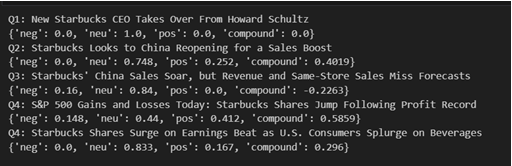

When looking at the sentiment analysis as of 5/24/25 (Invetopedia updates their website so headlines may change), 

# Best Analysis Forecast

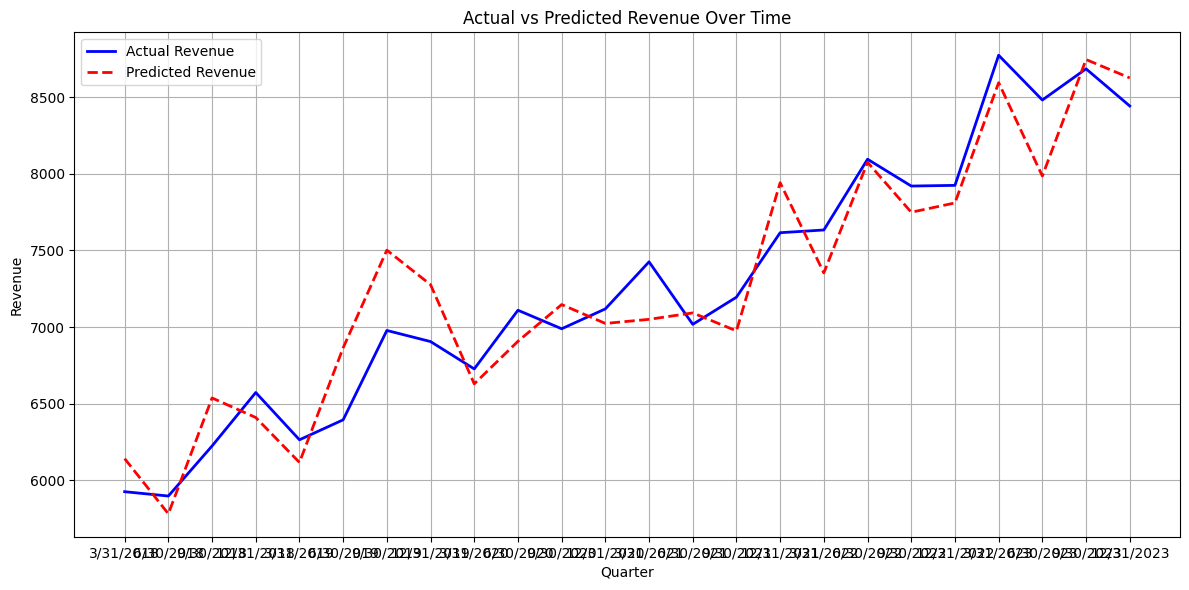

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("starbucks_financials_expanded.csv")
df['predicted_revenue'] = 2212.6390 + 1.1461 * df['expenses'] - 0.0364 * df['loyalty_members']

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['revenue'], label='Actual Revenue', color='blue', linewidth=2)
plt.plot(df['date'], df['predicted_revenue'], label='Predicted Revenue', color='red', linestyle='--', linewidth=2)

plt.title("Actual vs Predicted Revenue Over Time")
plt.xlabel("Quarter")
plt.ylabel("Revenue")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



## 5. Final Summary and Audit Reflection (25 points) In the same Word Document as before
Write a 1–2 paragraph summary answering the following:
- What was the most important variable and most insightful model?
- Was the narrative tone aligned with actual performance?
- Do you believe Starbucks' revenue may be overstated? Justify your answer.
- How did the IMPACT model help you organize your thinking?
- Include a final plot of actual vs. forecasted revenue.